**Lab 7 - Classifier models**


In [54]:
# Common used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Disable warning from not updated libraries
import warnings
warnings.filterwarnings('ignore')

# Part 1 - Performance Eval. for Classification Tree

In [2]:
# 1.1 - Load the dataset

iris_ds = pd.read_excel('Iris.xlsx')
iris_ds

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# We first separate the predictors with the target
nrow, ncol = iris_ds.shape
predictors = iris_ds.iloc[:, :ncol - 1]
target = iris_ds.iloc[:, -1]

# 70 - 30 split 
X_train, X_test, y_train, y_test = train_test_split(predictors, target,  test_size=.3)

# Create and fit the model
DTC = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=42)
DTC.fit(X_train, y_train)

# Make a prediction
y_predict = DTC.predict(X_test)

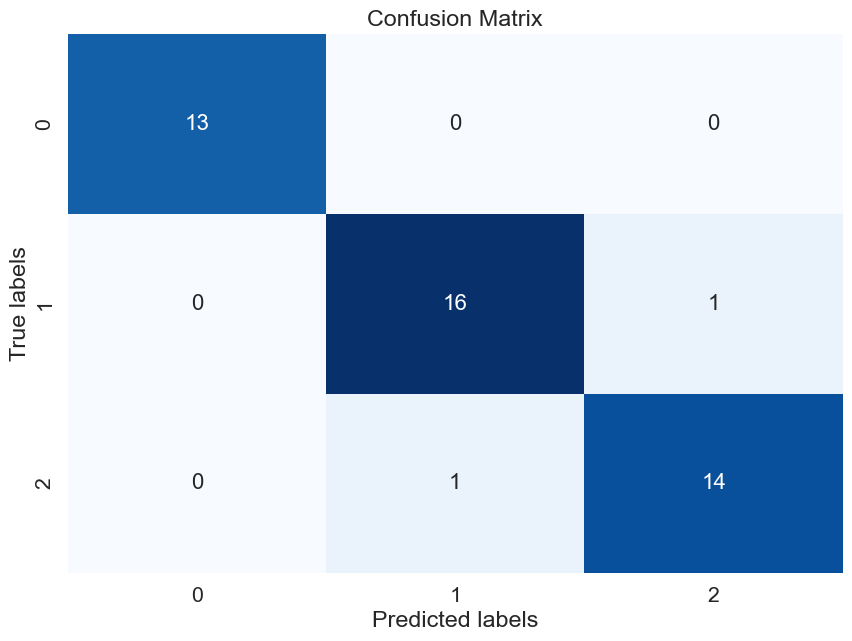

In [32]:
from sklearn.metrics import confusion_matrix

# 1.2 - Confusion matrix

cm = confusion_matrix(y_test, y_predict)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))  # Setting the figure size for better readability
sns.set(font_scale=1.4)  # Increasing font size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from sklearn.metrics import classification_report

# Model performance metrics
print(classification_report(y_test, y_predict, target_names=['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        17
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



# Part 2 - Predict car safety using DTC along with gini index

The first step is import of dataset and data preparation / check

In [35]:
# Import of dataset
car_ds = pd.read_csv('car_evaluation.csv', header=None)
car_ds

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [44]:
# Fix of ds column names (not present in original csv)
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_ds.columns = col_names

print(f"Number of null values: {car_ds.isnull().sum().sum()}")
car_ds

Number of null values: 0


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## Subtask 1 - Data Preparation

- Target attribute: *class*
- input attributes: all columns without *class*

There are $1209$ instances in the train dataset and only $519$ in the test one, this is because we are doing a 70/30 split

In [46]:
# Dataset split 70/30 rule

X = car_ds.drop(['class'], axis=1)
y = car_ds['class']

# 70 - 30 split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=.3, random_state=42)

print(f'Shape of train ds: {X_train.shape}, shape of test ds: {X_test.shape}')

Shape of train ds: (1209, 6), shape of test ds: (519, 6)


In [53]:
from category_encoders import OrdinalEncoder

# Feature transformation using encoder (categorical to ordinal)
encoder = OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train) # We also 'fit' in this stage
X_test = encoder.transform(X_test)

X_train

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3
...,...,...,...,...,...,...
1130,1,1,2,2,3,1
1294,1,4,1,2,1,3
860,2,4,1,2,3,1
1459,3,2,3,3,2,3


## Subtask 2 - Create Classification Tree model

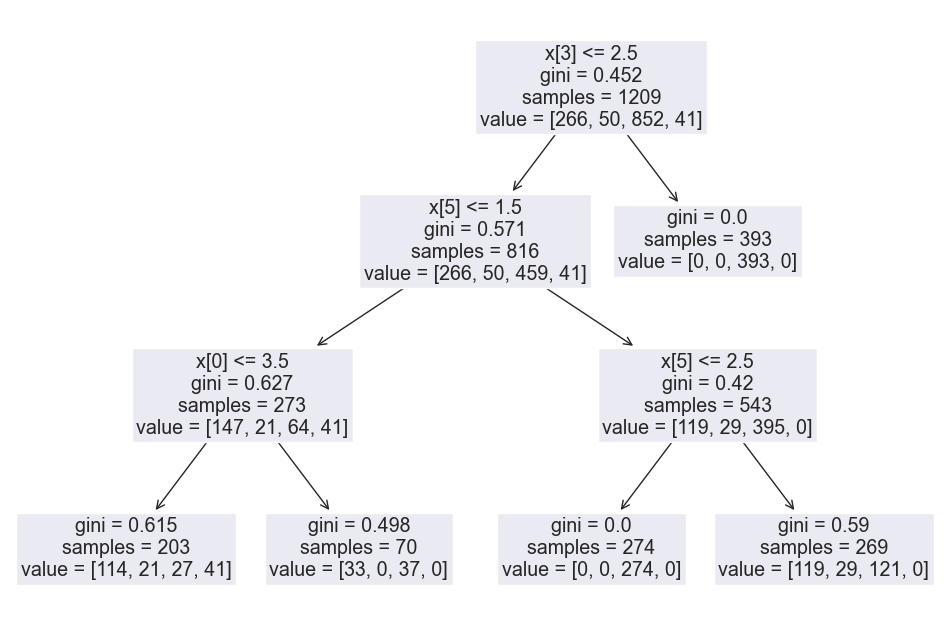

In [58]:
from sklearn.tree import plot_tree

# 2.1 - DTC with gini criterion

tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3)

# Tree visualization
plt.figure(figsize=(12,8))
plot_tree(tree_gini.fit(X_train, y_train))

tree_gini.fit(X_train, y_train)

y_pred_gini = tree_gini.predict(X_test)
